# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

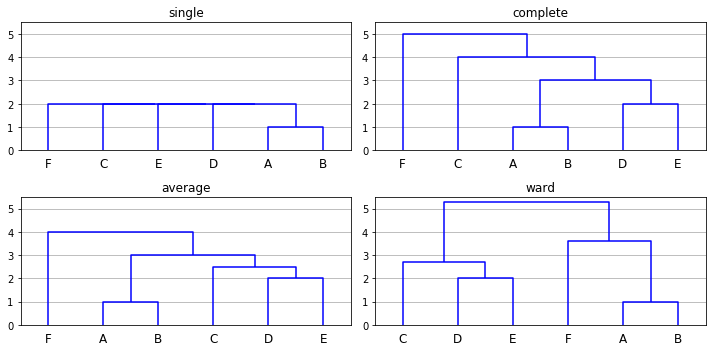

In [5]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [6]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [7]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [8]:
d1

array([[0., 1., 1., 5., 5.],
       [1., 0., 3., 5., 5.],
       [1., 3., 0., 3., 1.],
       [5., 5., 3., 0., 1.],
       [5., 5., 1., 1., 0.]])

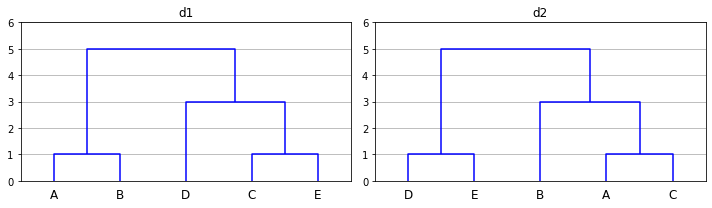

In [9]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

predictions: [3 1 1 0 0 1 3 2 0 0 1 2 3 2 1 0 0 2 3 1 0 0 1 1 3]
means: [[5.]
 [1.]
 [3.]
 [0.]]
predictions: [3 1 1 0 0 1 3 2 0 0 1 2 3 2 1 0 0 2 3 1 0 0 1 1 3]
means: [[5.]
 [1.]
 [3.]
 [0.]]


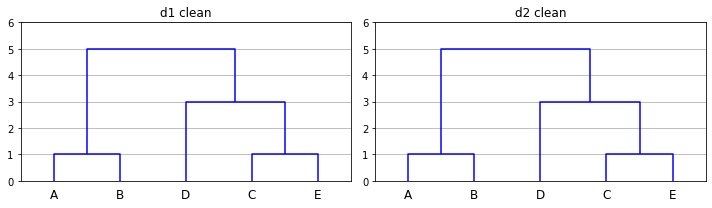

In [12]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.
from sklearn.cluster import KMeans

def cleanDistanceMatrix(d):
    # run kmeans(4) on the 6 unique values in the matrix, to see which 3 can be aggregated
    model = KMeans(4)
    model.fit(d.reshape(-1,1))
    predictions = model.predict(d.reshape(-1,1))
    print(f'predictions: {predictions}')
    print(f'means: {model.cluster_centers_}')
    d_clean = np.array([model.cluster_centers_[i] for i in predictions]).reshape(5,5)
        
    return d_clean


d1_clean = cleanDistanceMatrix(d1)
d2_clean = cleanDistanceMatrix(d2)

# Plot hierarchical clustering of the 2 clean distance matrixes

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title(f'd{i+1} clean')

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()


### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [14]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
df[:10]
df.shape

(1156, 41)

In [15]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [16]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [17]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

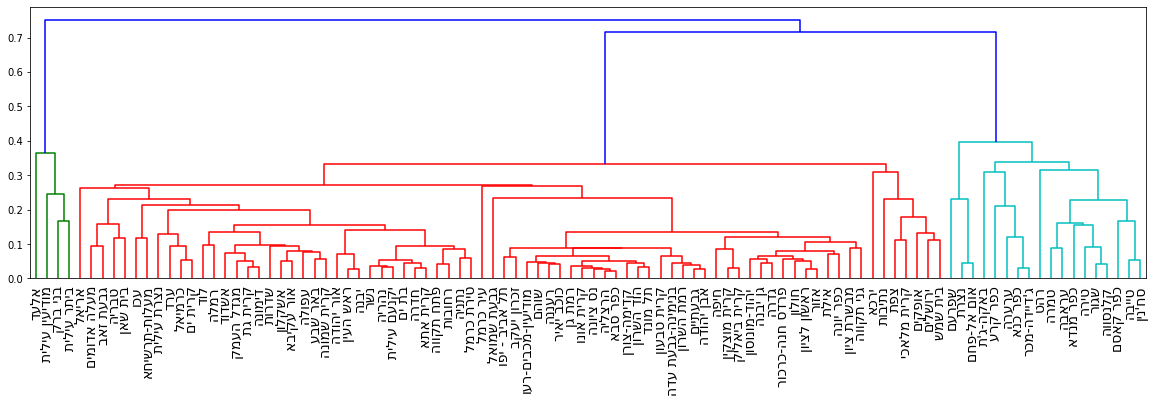

In [18]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

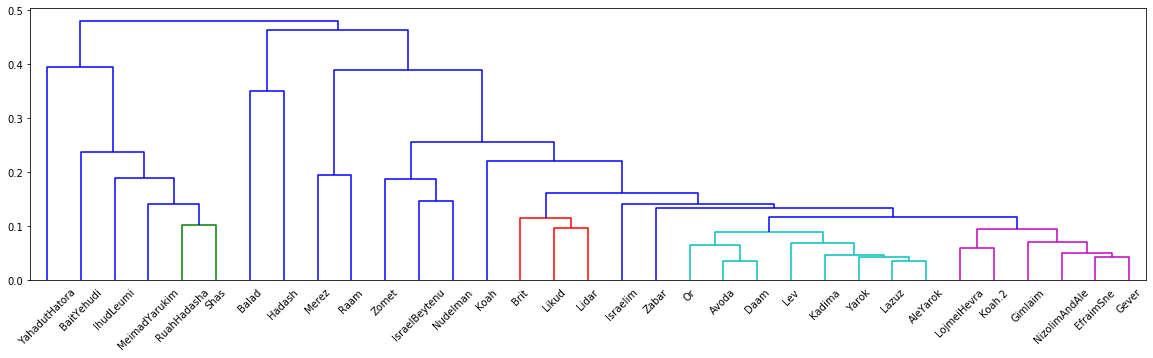

In [22]:
df.drop('Koah.1', axis=1, inplace=True, errors='ignore')  # drop party that always has 0 votes
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 5

party_names = list(df.columns[7:])

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 33))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):

x = x.T/(np.sum(x, axis=0).reshape(-1, 1))
x = pd.DataFrame(x,columns=labels_r)

lnk = hierarchy.linkage(x, 'average')
plt.figure(figsize=(20, 5))
hierarchy.dendrogram(lnk, labels=party_names, leaf_font_size=10, color_threshold=0.115);

#### Discussion
* The dendogram shown above was received by clustering parties instead of cities, and by only examining the 5 biggest cities (25% of votes)
* The main "right wing" party Likud is almost on it's own in a cluster, and the 2 main "left wing" parties Avoda and Kadima are in a cluster with a few other minor parties
* We can also see some niche left wing parties in the right wing cluster (Leader) and some niche neutral parties in the left wing cluster. This means that these niche parties have the same voting patterns as the main parties in their cluster, i.e they both have most of their votes in a certain city. This makes sense because certain big cities can contain the majority of the votes both for right and for left wing parties. 
* We can see that in the other larger cluster (blue), that was formed after the right and left clusters were formed, there are many parties, some are radical left and some are radical right, some are ultra orthodox and some are muslim. These parties are less similar to each other compared to the left and right clusters (and one additional purple cluster, containing mainly niche parties with social goals.


## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [1]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

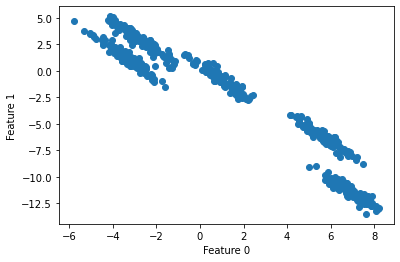

In [2]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

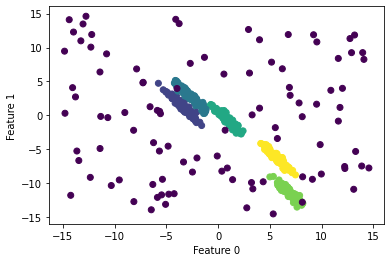

In [4]:
# Adding Noise to data
import pandas as pd
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

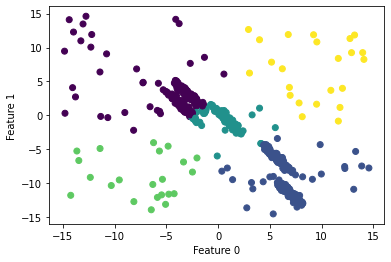

In [5]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



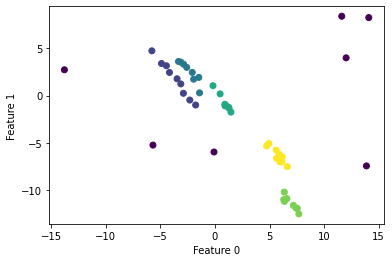

In [135]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y_samples = y.iloc[labeled_samples,0]
X_samples = X.iloc[labeled_samples,[0,1]]
plot(X_samples.values,y_samples)

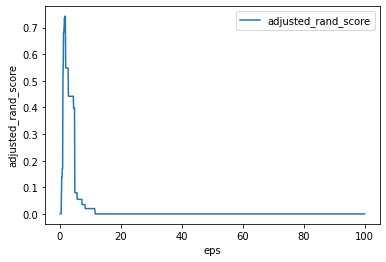

In [157]:
# minPts are given and are not required to be estimated.
# Yet, in the cells after completing the task feel free to play with it and get better result if you can!
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score


minPts = 5 

# # YOUR CODE HERE - keep results in this cell

# # cluster the data into five clusters

results_list = []

for eps in np.linspace(0.1,100,1000,dtype=float):
    dbscan = DBSCAN(min_samples=minPts,eps=eps)
    dbscan.fit(X_samples)
    try:
        score = metrics.adjusted_rand_score(y_samples.values,dbscan.labels_)
    except:
        score = None
    results_list.append({'eps':eps, 'adjusted_rand_score':score})

results_df = pd.DataFrame(results_list)
results_df.set_index('eps').plot();
plt.ylabel('adjusted_rand_score');

best_eps: 1.7000000000000002


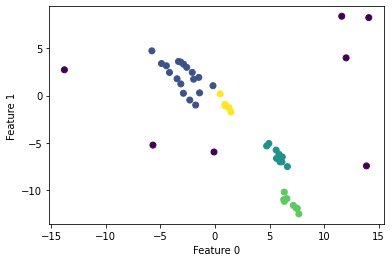

In [159]:
best_eps = results_df.set_index('eps').adjusted_rand_score.idxmax()
dbscan = DBSCAN(min_samples=minPts,eps=best_eps)
dbscan.fit(X_samples)
print('best_eps: %s' % best_eps)
plot(X_samples.values,dbscan.labels_)

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

Since all of the results for minPts=50 ended up with adjusted_rand_score=0, we changed it to minPts=5. <br>
We iterated over 1000 values to find the best 𝜖 using adjusted_rand_score. <br>Apparently, adjusted_rand_score return 0 for 11.6 >= 𝜖 <= 0.4. therefore, the search range can be narrowed down to 0.4-11.6

## Challenge 2.2


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

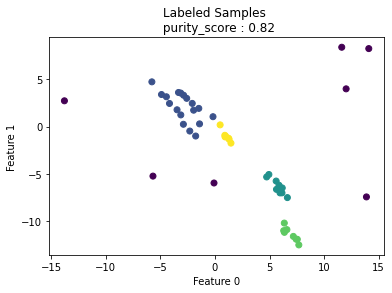

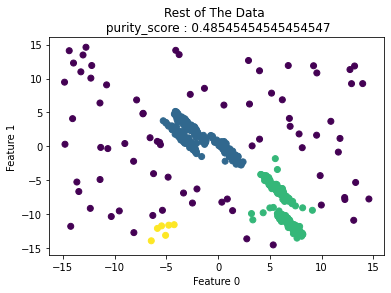

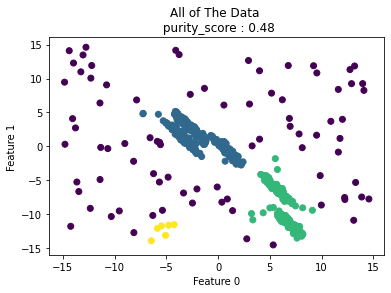

In [196]:
def calc_purity_score(y_ture,y_pred,eps=best_eps,):
        
        contingency_matrix = metrics.cluster.contingency_matrix(y_ture.values,y_pred)
        score = np.sum(np.max(contingency_matrix, axis=0)) / len(y_ture)
        
        return score

def show_dbscan_results(X,y, eps=best_eps, minPts=minPts,title='dbscab results'):
    
    dbscan = DBSCAN(min_samples=minPts,eps=best_eps)
    dbscan.fit(X)
    plt.title((f'{title} \n purity_score : {calc_purity_score(y,dbscan.labels_)}'))
    plot(X.values,dbscan.labels_)

show_dbscan_results(X_samples,y_samples,title='Labeled Samples')
show_dbscan_results(X[~X.index.isin(labeled_samples)],y[~y.index.isin(labeled_samples)],title='Rest of The Data')
show_dbscan_results(X,y,title='All of The Data')

looks like 10% of the data (50 our of 500) is not enough for the model to learn the entire structure of the clusters and their characteristics




# Good Luck and Enjoy Learning Machine Learning!

